"""<br>
@Author:Vijay Kumar M N<br>
@Date: 2024-11-12<br>
@Last Modified by:Vijay Kumar M N<br>
@Last Modified: 2024-11-12<br>
@Title :Python Program to bank dataset that the he will subscribe or not<br>
"""

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc,roc_auc_score

In [69]:
df=pd.read_csv('bank.csv',delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [70]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [71]:
print(df.isnull().sum())
print(df.info())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 

In [72]:
#categorical_values=['job','marital','education','default','housing','loan','contact','month','poutcome']
#df=pd.get_dummies(df,columns=categorical_values,drop_first=True)
#df.head()
#Encode other categorical features
'''label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'y':  # Exclude the target variable
        df[col] = label_encoder.fit_transform(df[col])

df['y'] = label_encoder.fit_transform(df['y'])
df.head()'''


"label_encoder = LabelEncoder()\ncategorical_cols = df.select_dtypes(include=['object']).columns\nfor col in categorical_cols:\n    if col != 'y':  # Exclude the target variable\n        df[col] = label_encoder.fit_transform(df[col])\n\ndf['y'] = label_encoder.fit_transform(df['y'])\ndf.head()"

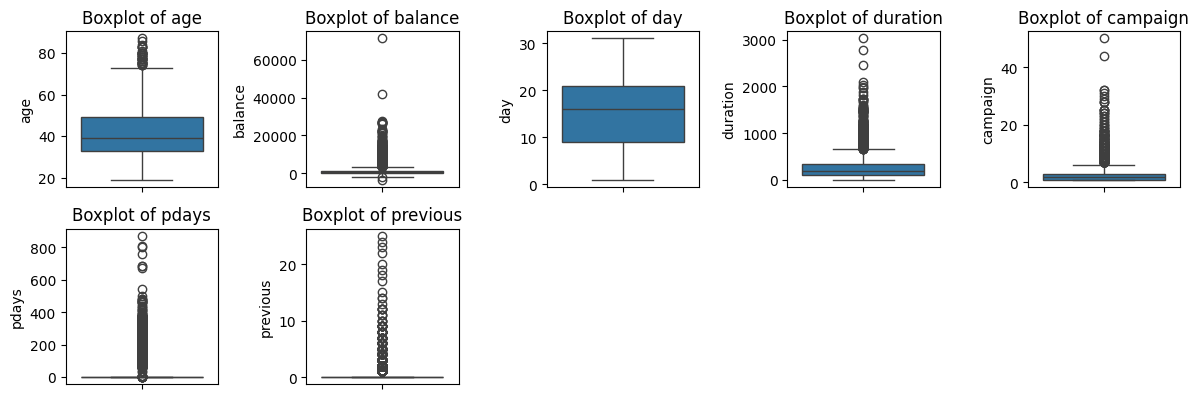

In [73]:
#to check wheather the outliers present or not
numerical_col=df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_col):  # Exclude target column
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [74]:
#numerical_col=df[['age','balance','day','duration','campaign','pdays','previous']]
for col in numerical_col:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out rows that have values within the bounds for each column
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print(df.shape)


(2799, 17)


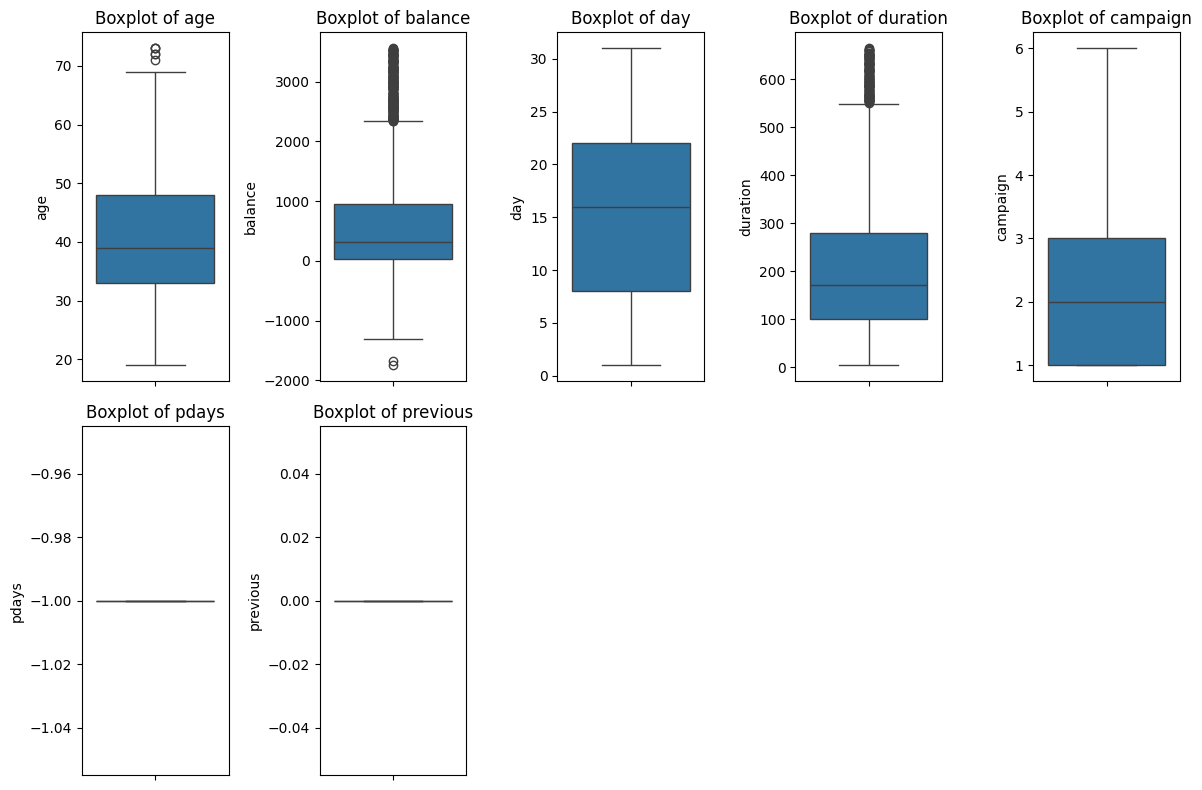

In [75]:
#to check wheather the outliers present or not

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_col):  # Exclude target column
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [76]:
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'y':  # Exclude the target variable
        df[col] = label_encoder.fit_transform(df[col])

df['y'] = label_encoder.fit_transform(df['y'])


In [77]:
X = df.drop(['y'], axis=1)#features
y = df['y']#target variable

In [78]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [79]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [81]:
# Predict on test set
y_pred = model.predict(X_test)

In [82]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[789   4]
 [ 42   5]]


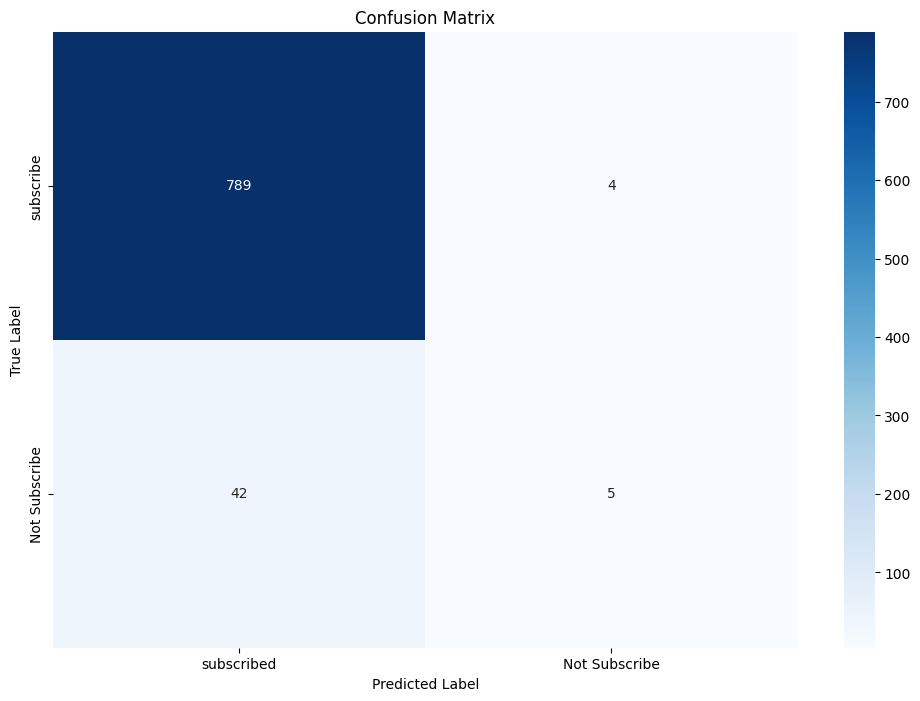

In [83]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['subscribed','Not Subscribe'], 
            yticklabels=[ 'subscribe','Not Subscribe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [84]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9452380952380952
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       793
           1       0.56      0.11      0.18        47

    accuracy                           0.95       840
   macro avg       0.75      0.55      0.58       840
weighted avg       0.93      0.95      0.93       840



In [85]:
#roc
y_prob= model.predict_proba(X_test)[:,1]
#print(y_prob)

false_positive_rate ,true_positive_rate,threshold =roc_curve(y_test,y_prob)
print(threshold)
roc_auc =auc(false_positive_rate,true_positive_rate)
#roc_auc

[           inf 7.38479313e-01 6.36984062e-01 6.08693091e-01
 6.02547623e-01 4.70163375e-01 4.66691829e-01 4.61307809e-01
 4.55895933e-01 4.28611674e-01 4.23446513e-01 4.14822405e-01
 3.92143507e-01 3.77173305e-01 3.28766913e-01 3.16361554e-01
 3.07398978e-01 3.05697671e-01 3.02419606e-01 3.00226956e-01
 2.66022224e-01 2.52123918e-01 2.08391445e-01 1.97659784e-01
 1.65667539e-01 1.64733364e-01 1.60314272e-01 1.57812730e-01
 1.46898556e-01 1.44198432e-01 1.33576516e-01 1.32532779e-01
 1.05494310e-01 1.05134438e-01 8.66623418e-02 8.51700514e-02
 8.14393258e-02 7.87659150e-02 7.46894652e-02 7.42633240e-02
 6.86613875e-02 6.85549623e-02 6.61131971e-02 6.60979963e-02
 6.09871369e-02 6.09736620e-02 5.58258453e-02 5.57856883e-02
 5.21208473e-02 5.20177986e-02 4.69363419e-02 4.69286948e-02
 4.31025314e-02 4.29648330e-02 4.08390451e-02 4.07198601e-02
 3.57967852e-02 3.56968354e-02 2.90409412e-02 2.89842936e-02
 2.56364635e-02 2.54245429e-02 2.50155733e-02 2.50011194e-02
 2.37004868e-02 2.368146

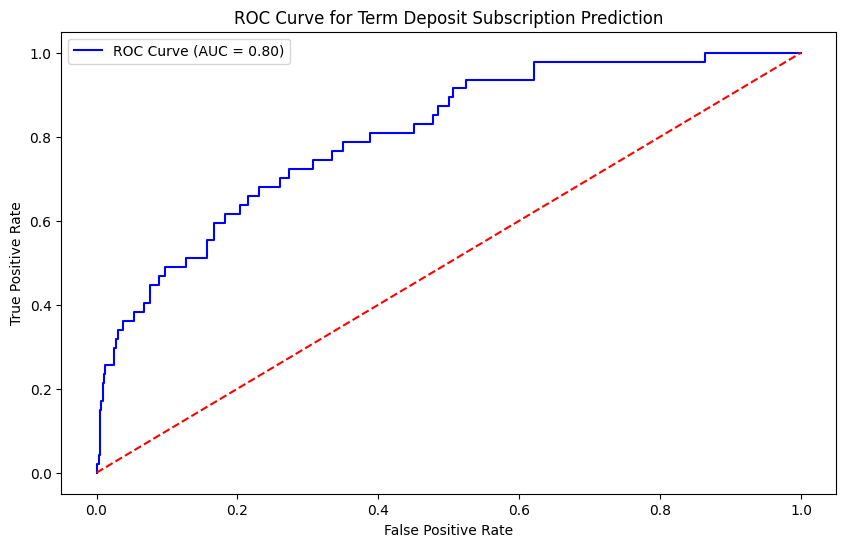

In [86]:
# Get prediction probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Term Deposit Subscription Prediction')
plt.legend()
plt.show()


KNN

In [87]:
# Train a KNN model
model =  KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
model.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
# Predict on test set
y_pred = model.predict(X_test)

In [89]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[791   2]
 [ 45   2]]


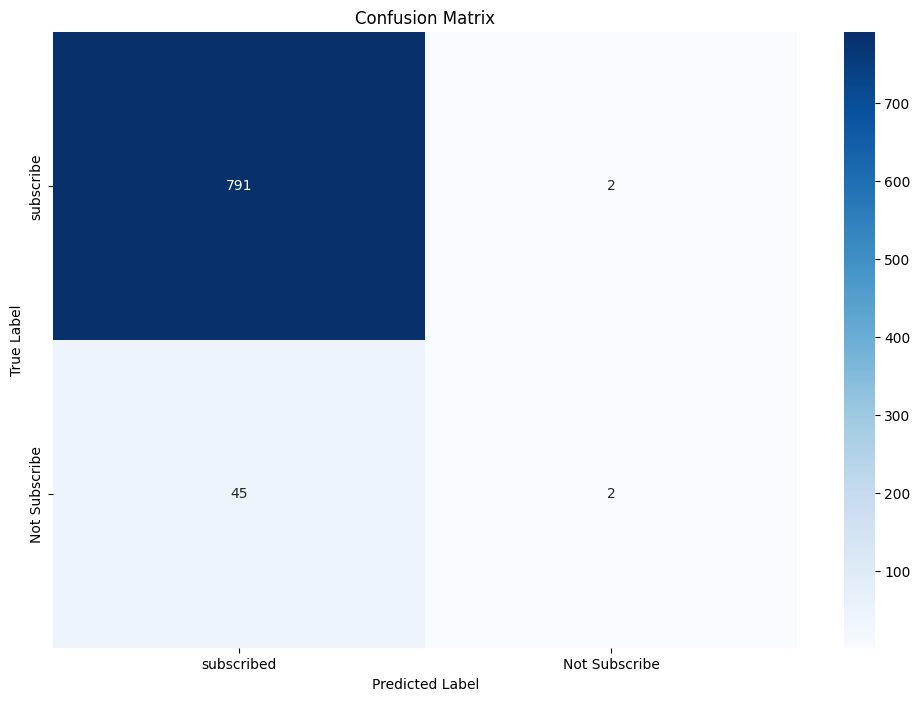

In [90]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['subscribed','Not Subscribe'], 
            yticklabels=[ 'subscribe','Not Subscribe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [91]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.944047619047619
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       793
           1       0.50      0.04      0.08        47

    accuracy                           0.94       840
   macro avg       0.72      0.52      0.52       840
weighted avg       0.92      0.94      0.92       840



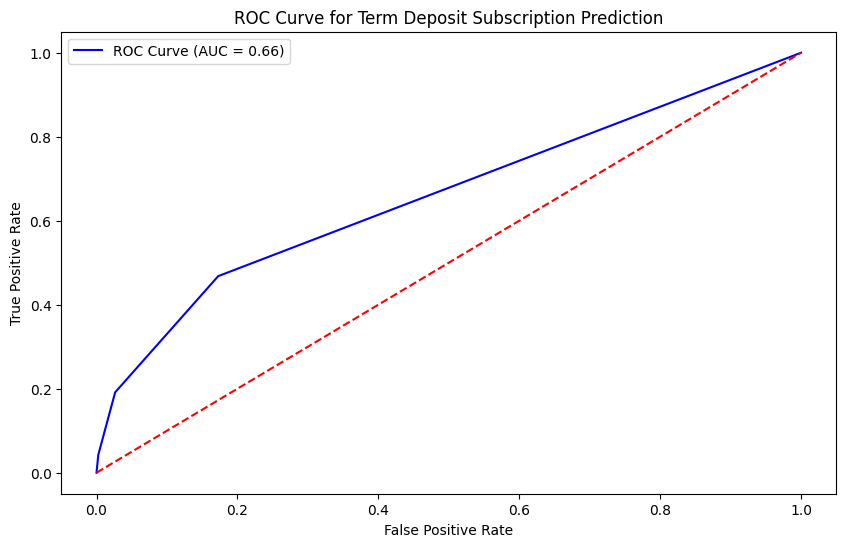

In [92]:
# Get prediction probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Term Deposit Subscription Prediction')
plt.legend()
plt.show()
